# Площадь под графиком и управление порогом
### Сибирев Фёдор ПМ22-3

In [6]:
from sklearn.datasets import make_classification, fetch_openml
from sklearn.multiclass import OneVsRestClassifier
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc,\
classification_report, RocCurveDisplay, PrecisionRecallDisplay
import matplotlib.pyplot as plt
import pandas as pd
from numpy import argmax
from scipy.stats import hmean
import numpy as np

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=2)

In [ ]:
model = LogisticRegression().fit(X_train, y_train)

In [ ]:
y_pred_proba = model.predict_proba(X_test)

In [ ]:
y_pred_proba

array([[4.02731514e-03, 9.95972685e-01],
       [2.00515726e-03, 9.97994843e-01],
       [9.94701169e-01, 5.29883066e-03],
       [8.47625806e-01, 1.52374194e-01],
       [1.66665036e-03, 9.98333350e-01],
       [4.99938552e-01, 5.00061448e-01],
       [9.80236861e-01, 1.97631392e-02],
       [9.76536616e-01, 2.34633843e-02],
       [1.79993032e-02, 9.82000697e-01],
       [2.93534820e-01, 7.06465180e-01],
       [9.95837980e-01, 4.16201961e-03],
       [2.53553400e-01, 7.46446600e-01],
       [9.92334325e-01, 7.66567488e-03],
       [3.80412811e-02, 9.61958719e-01],
       [6.47854323e-02, 9.35214568e-01],
       [1.92346446e-01, 8.07653554e-01],
       [8.55196114e-01, 1.44803886e-01],
       [4.34676792e-02, 9.56532321e-01],
       [8.43042493e-01, 1.56957507e-01],
       [5.50912415e-02, 9.44908759e-01],
       [1.32992380e-01, 8.67007620e-01],
       [5.89717936e-01, 4.10282064e-01],
       [9.79518433e-01, 2.04815673e-02],
       [3.32906248e-01, 6.67093752e-01],
       [9.957366

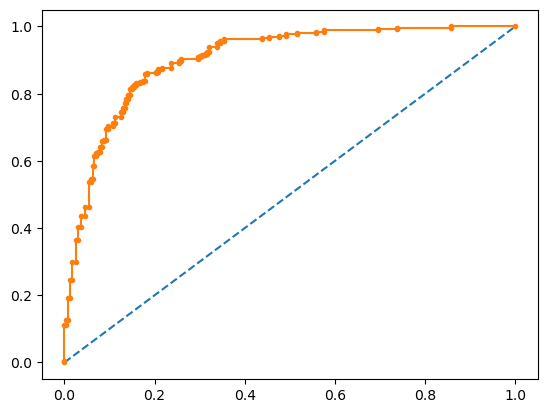

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [ ]:
roc_auc_score(y_test, y_pred_proba[:, 1])

0.9028205128205128

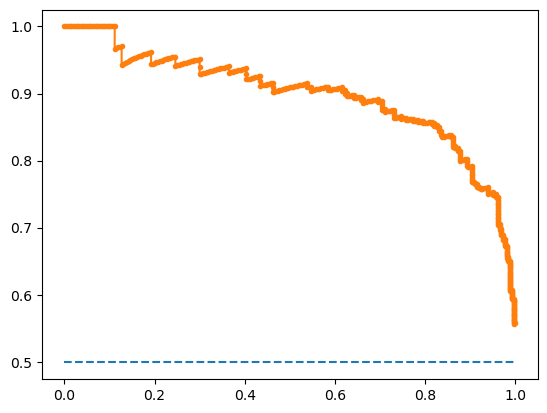

In [ ]:
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba[:, 1])
no_skill = len(y[y==1]) / len(y)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
plt.plot(recall, precision, marker='.')
plt.show()

In [ ]:
auc(recall, precision)

0.8977244980325833

In [ ]:
y_test_pred = model.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.83      0.82      0.83       240
           1       0.84      0.85      0.84       260

    accuracy                           0.83       500
   macro avg       0.83      0.83      0.83       500
weighted avg       0.83      0.83      0.83       500



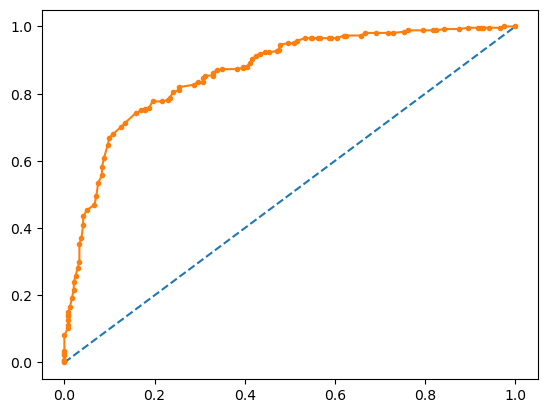

In [ ]:
model2 = KNeighborsClassifier(n_neighbors=250).fit(X_train, y_train)
y_pred2_proba = model2.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_pred2_proba[:, 1])

plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [ ]:
roc_auc_score(y_test, y_pred2_proba[:, 1])

0.8630608974358974

In [ ]:
X, y = make_classification(n_samples=1000, n_classes=2, weights=[0.99, 0.01], random_state=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=4)

print('Датасет: Class0=%d, Class1=%d' % (len(y[y==0]), len(y[y==1])))
print('Обучающая: Class0=%d, Class1=%d' % (len(y_train[y_train==0]), len(y_train[y_train==1])))
print('Тестовая: Class0=%d, Class1=%d' % (len(y_test[y_test==0]), len(y_test[y_test==1])))

Датасет: Class0=985, Class1=15
Обучающая: Class0=490, Class1=10
Тестовая: Class0=495, Class1=5


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y)

print('Датасет: Class0=%d, Class1=%d' % (len(y[y==0]), len(y[y==1])))
print('Обучающая: Class0=%d, Class1=%d' % (len(y_train[y_train==0]), len(y_train[y_train==1])))
print('Тестовая: Class0=%d, Class1=%d' % (len(y_test[y_test==0]), len(y_test[y_test==1])))

Датасет: Class0=985, Class1=15
Обучающая: Class0=492, Class1=8
Тестовая: Class0=493, Class1=7


In [ ]:
model = LogisticRegression().fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)

y_test_pred = model.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       493
           1       0.00      0.00      0.00         7

    accuracy                           0.98       500
   macro avg       0.49      0.50      0.50       500
weighted avg       0.97      0.98      0.98       500



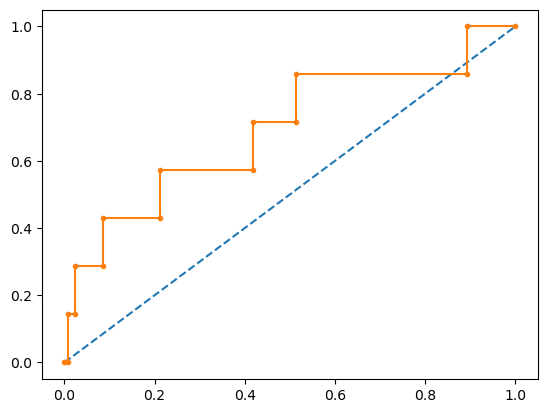

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])

plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

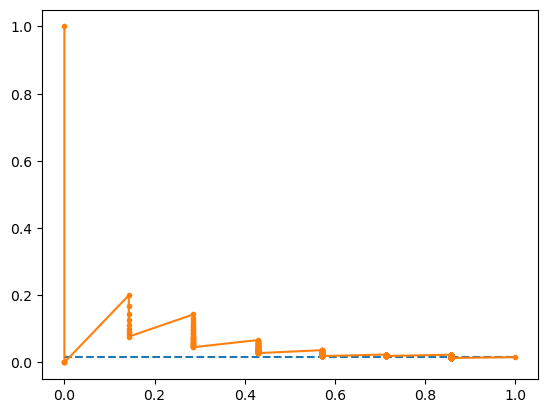

In [ ]:
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba[:, 1])
no_skill = len(y[y==1]) / len(y)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
plt.plot(recall, precision, marker='.')
plt.show()

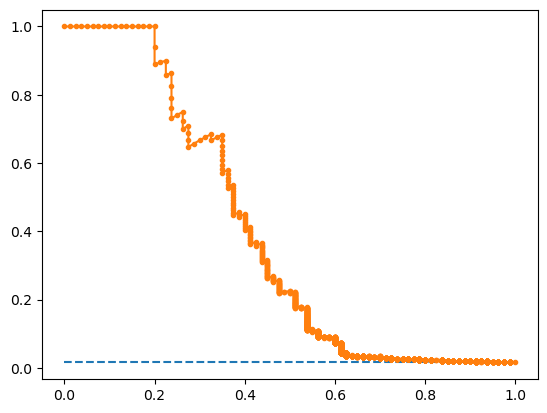

In [ ]:
X, y = make_classification(n_samples=10000, n_classes=2, weights=[0.99, 0.01], random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y)

model = LogisticRegression().fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)

p, r, pr_thresholds = precision_recall_curve(y_test, y_pred_proba[:, 1])
no_skill = len(y[y==1]) / len(y)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
plt.plot(r, p, marker='.')
plt.show()

In [ ]:
from numpy import argmax

In [ ]:
f1 = (2 * p * r) / (p + r)
ix = argmax(f1)
print(pr_thresholds[ix])
print('Порог=%f, F-Score=%.3f' % (pr_thresholds[ix], f1[ix]))

0.19892289565443852
Порог=0.198923, F-Score=0.463


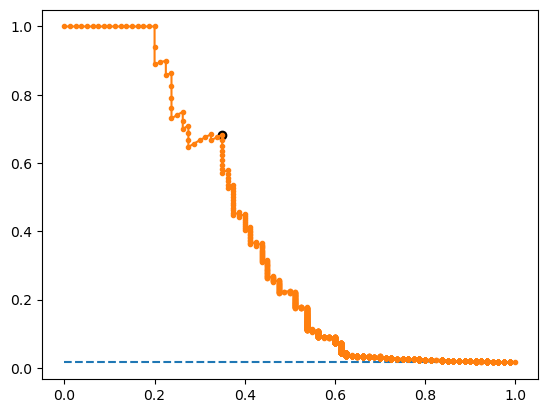

In [ ]:
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
plt.plot(r, p, marker='.')
plt.scatter(r[ix], p[ix], marker='o', color='black')
plt.show()

In [ ]:
y_pred = (y_pred_proba[:, 1] > pr_thresholds[ix]).astype('int')
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4920
           1       0.68      0.34      0.45        80

    accuracy                           0.99      5000
   macro avg       0.83      0.67      0.72      5000
weighted avg       0.98      0.99      0.98      5000



In [ ]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4920
           1       1.00      0.19      0.32        80

    accuracy                           0.99      5000
   macro avg       0.99      0.59      0.65      5000
weighted avg       0.99      0.99      0.98      5000



# Задания для самостоятельного выполнения

## 1. Повторите анализ из лабораторной работы, но с двумерными датасетами. Изобразите графически, как изменение порога влияет на расположение границы принятия решений.

In [ ]:
data1= pd.read_csv('C:\\Users\\CoolerMaster\\Downloads\\recipes.csv')
y = data1.drink_type
X = data1[['milk (in cl)', 'aroma pumps (=10 ml)']]
y, X

(0          frappucino
 1          frappucino
 2          frappucino
 3      iced chocolate
 4      iced chocolate
            ...       
 82      filter coffee
 83      filter coffee
 84    tea/herbal teas
 85    tea/herbal teas
 86    tea/herbal teas
 Name: drink_type, Length: 87, dtype: object,
     milk (in cl)  aroma pumps (=10 ml)
 0           10.0                   2.0
 1           10.0                   3.0
 2           15.0                   3.0
 3           10.0                   2.0
 4           10.0                   3.0
 ..           ...                   ...
 82           NaN                   NaN
 83           NaN                   NaN
 84           NaN                   NaN
 85           NaN                   NaN
 86           NaN                   NaN
 
 [87 rows x 2 columns])

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
# Преобразуем категориальные значения в числовые
y = label_encoder.fit_transform(y)

NameError: name 'y' is not defined

In [4]:
X, y = make_classification(n_samples=100, n_features=2, n_informative=2,  #синтетический датасет с двумя информативными признаками
                           n_redundant=0, n_classes=2, n_clusters_per_class=1, random_state=42)

model = LogisticRegression()
model.fit(X, y)

LogisticRegression()

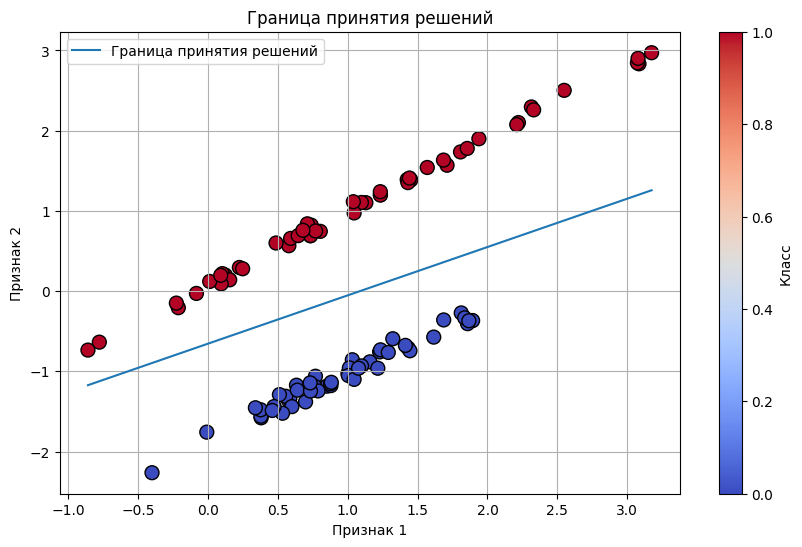

In [7]:
plt.figure(figsize=(10, 6)) #визуализация данных
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=100, edgecolors='k', linewidths=1)

coef = model.coef_[0]
intercept = model.intercept_
x_boundary = np.array([np.min(X[:, 0]), np.max(X[:, 0])])
y_boundary = -(coef[0] * x_boundary + intercept) / coef[1]
plt.plot(x_boundary, y_boundary, label='Граница принятия решений')

plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.title('Граница принятия решений')
plt.legend()
plt.colorbar(label='Класс')
plt.grid(True)
plt.show()

In [ ]:
plt.figure(figsize=(10, 6)) #визуализация данных
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=100, edgecolors='k', linewidths=1)

coef = model.coef_[0]
intercept = model.intercept_
x_boundary = np.array([np.min(X[:, 0]), np.max(X[:, 0])])
y_boundary = -(coef[0] * x_boundary + intercept) / coef[1]
plt.plot(x_boundary, y_boundary, label='Граница принятия решений')

plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.title('Граница принятия решений')
plt.legend()
plt.colorbar(label='Класс')
plt.grid(True)
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression().fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
data1

,drink_type,milk (in cl),ice cubes,coffee dose (in number of ristrettos),coffee dose (in number of espressos),aroma pumps (=10 ml),natural fruit extract pumps (=10ml),chocolate pumps (=30 ml),teaspoon powder (= 5ml),tablespoon powder (= 15ml),...,fruit packets,freshly pressed orange juice,honey (in grams),whipped cream,speculoos (in ml),filter coffee (in cl),coffee (in grams),tea bags,size (mixed drinks),size (coffee)
0,frappucino,10.0,6.0,1.0,NaN,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,small,NaN
1,frappucino,10.0,8.0,2.0,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,medium,NaN
2,frappucino,15.0,8.0,3.0,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,large,NaN
3,iced chocolate,10.0,6.0,NaN,NaN,2.0,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,small,NaN
4,iced chocolate,10.0,8.0,NaN,NaN,3.0,NaN,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,medium,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,filter coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,45.0,21.176471,NaN,medium,NaN
83,filter coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,50.0,23.529412,NaN,large,NaN
84,tea/herbal teas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,small,NaN
85,tea/herbal teas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,medium,NaN


In [ ]:
data2 = pd.read_csv('C:\\Users\\CoolerMaster\\Downloads\\car evaluation_with.csv')
y = data2.vhigh
X = data2[['med', '2.1']]
y, X

(0       vhigh
 1       vhigh
 2       vhigh
 3       vhigh
 4       vhigh
         ...  
 1721      low
 1722      low
 1723      low
 1724      low
 1725      low
 Name: vhigh, Length: 1726, dtype: object,
        med  2.1
 0     high    2
 1      low    2
 2      med    2
 3     high    2
 4      low    2
 ...    ...  ...
 1721   med    5
 1722  high    5
 1723   low    5
 1724   med    5
 1725  high    5
 
 [1726 rows x 2 columns])

In [ ]:
X, y = make_classification(n_samples=100, n_features=2, n_informative=2,  #синтетический датасет с двумя информативными признаками
                           n_redundant=0, n_classes=2, n_clusters_per_class=1, random_state=42)

model = LogisticRegression()
model.fit(X, y)

## 2. Повторите анализ на реальном датасете для бинарной классификации. Проинтерпретируйте результат, сделайте вывод.

https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data?resource=download<br>
Набор данных о раке молочной железы, штат Висконсин (диагностика)<br>
Диагноз (М = злокачественный, В = доброкачественный)

In [ ]:
data = pd.read_csv('C:\\Users\\CoolerMaster\\Downloads\\data.csv').iloc[:, :-1]
data
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
data['diagnosis'] = data['diagnosis'].replace({'M': 0, 'B': 1})
y = data.diagnosis
X = data.drop(['diagnosis'], axis = 1)
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


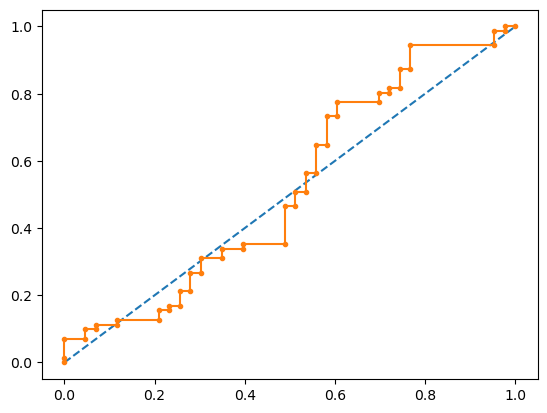

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression().fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

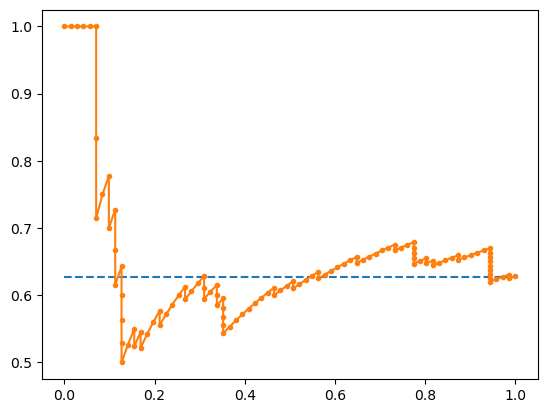

In [ ]:
precision, recall, pr_thresholds = precision_recall_curve(y_test, y_pred_proba[:, 1])
no_skill = len(y[y==1]) / len(y)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
plt.plot(recall, precision, marker='.')
plt.show()

In [ ]:
auc(recall, precision)

0.6509729830989727

In [ ]:
y_test_pred = model.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        43
           1       0.62      1.00      0.77        71

    accuracy                           0.62       114
   macro avg       0.31      0.50      0.38       114
weighted avg       0.39      0.62      0.48       114



In [ ]:
f1 = (2 * precision * recall) / (precision + recall)
ix = argmax(f1)
print('Порог=%f, F-Score=%.3f' % (pr_thresholds[ix], f1[ix]))

Порог=0.500034, F-Score=0.784


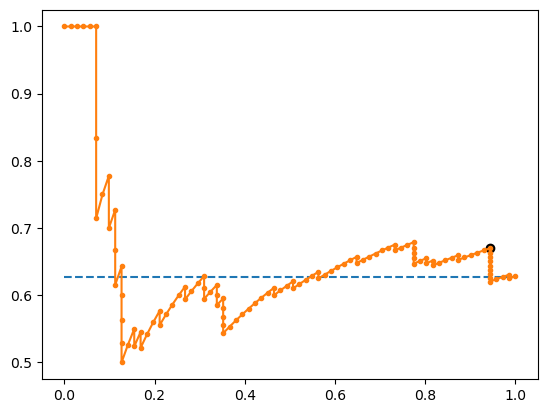

In [ ]:
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
plt.plot(recall, precision, marker='.')
plt.scatter(recall[ix], precision[ix], marker='o', color='black')
plt.show()

In [ ]:
y_pred = (y_pred_proba[:, 1] > pr_thresholds[ix]).astype('int')
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.23      0.34        43
           1       0.67      0.93      0.78        71

    accuracy                           0.67       114
   macro avg       0.67      0.58      0.56       114
weighted avg       0.67      0.67      0.61       114



## 3. В задании по оптимизации порога используйте ROC и среднее геометрическое между TPR и FPR как критерий оптимизации.

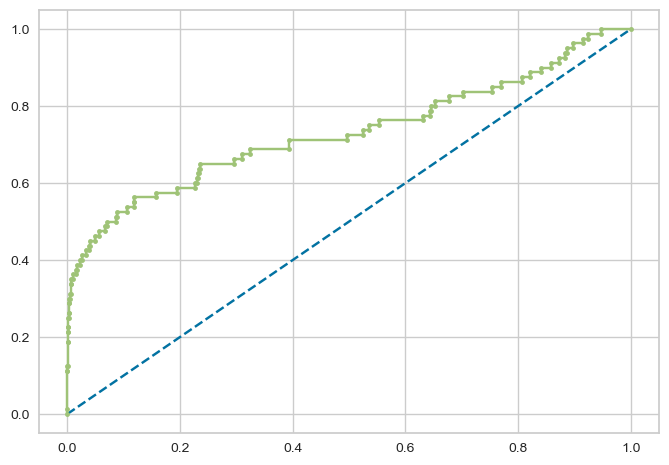

In [ ]:
X, y = make_classification(n_samples=10000, n_classes=2, weights=[0.99, 0.01], random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y)

model = LogisticRegression().fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)

fpr, tpr, roc_thresholds = roc_curve(y_test, y_pred_proba[:, 1])
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [ ]:
from numpy import argmax
import math
ix1 = argmax(tpr - fpr)
gmeans = (tpr * (1-fpr)) ** 0.5
ix1, gmeans

(58,
 array([0.        , 0.1118034 , 0.3354102 , 0.33537611, 0.35351746,
        0.35348152, 0.43292468, 0.43279262, 0.46074293, 0.46069605,
        0.47405233, 0.47385935, 0.49949161, 0.49944074, 0.51177447,
        0.51156592, 0.53537228, 0.53526312, 0.54677547, 0.54632921,
        0.55759492, 0.55713909, 0.57899592, 0.57893668, 0.58956026,
        0.58883584, 0.59925852, 0.59747308, 0.60768704, 0.60731064,
        0.61734952, 0.61549686, 0.62534543, 0.62391369, 0.63358735,
        0.63133376, 0.64082803, 0.63927598, 0.64860897, 0.64812895,
        0.65732273, 0.65404464, 0.66306637, 0.66043839, 0.66930373,
        0.66547022, 0.67416954, 0.67299272, 0.68156623, 0.67565085,
        0.68404435, 0.68358735, 0.69187356, 0.68536531, 0.69347643,
        0.68849614, 0.69645589, 0.6960545 , 0.70391977, 0.68848322,
        0.696091  , 0.68021174, 0.68756559, 0.67441446, 0.68155132,
        0.67940074, 0.68644135, 0.68625997, 0.69322725, 0.69240215,
        0.69929189, 0.69836481, 0.70517829,

In [ ]:
y_pred = (y_pred_proba[:, 1] > roc_thresholds[ix1]).astype('int')
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.88      0.93      4920
           1       0.07      0.55      0.12        80

    accuracy                           0.88      5000
   macro avg       0.53      0.72      0.53      5000
weighted avg       0.98      0.88      0.92      5000



## 4.При оптимизации порога по PR-кривой используйте другую F-метрику - сначала с преимуществом precision, а затем - с превалированием recall. Изобразите получившиеся пороги на графике. Проанализируйте метрики получившихся моделей.

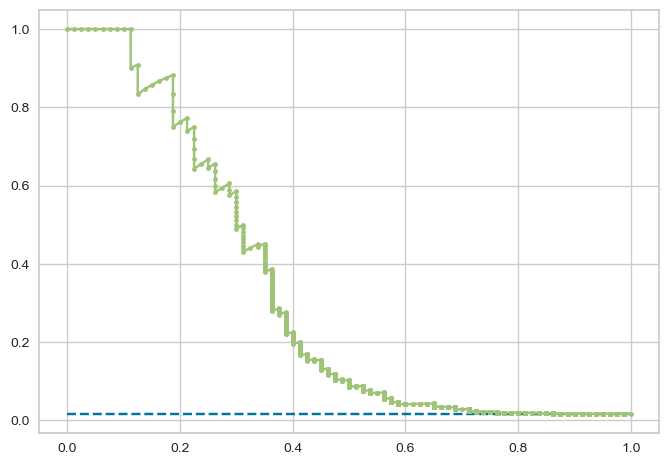

In [ ]:
p, r, pr_thresholds = precision_recall_curve(y_test, y_pred_proba[:, 1])
no_skill = len(y[y==1]) / len(y)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
plt.plot(r, p, marker='.')
plt.show()

In [ ]:
y_test_pred = model.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4920
           1       0.79      0.19      0.30        80

    accuracy                           0.99      5000
   macro avg       0.89      0.59      0.65      5000
weighted avg       0.98      0.99      0.98      5000



## 5. Постройте классификационные кривые для задачи множественной классификации. Проинтерпретируйте результат.

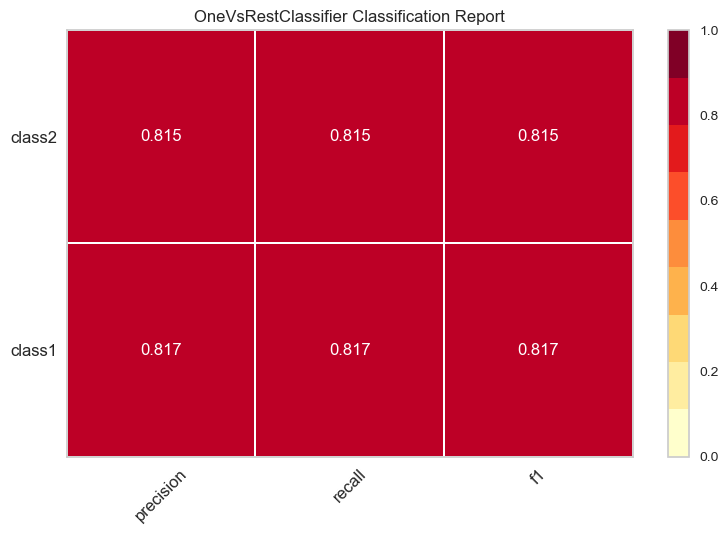

<AxesSubplot:title={'center':'OneVsRestClassifier Classification Report'}>

In [ ]:
from yellowbrick.classifier import ClassificationReport

X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y)

model = OneVsRestClassifier(LogisticRegression(random_state = 42)).fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)

visualizer = ClassificationReport(model, classes=['class1', 'class2'])

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

## 6. Используйте для построения кривых библиотеку yellowbrick.

In [ ]:
pip install yellowbrick

     -------------------------------------- 282.6/282.6 kB 1.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


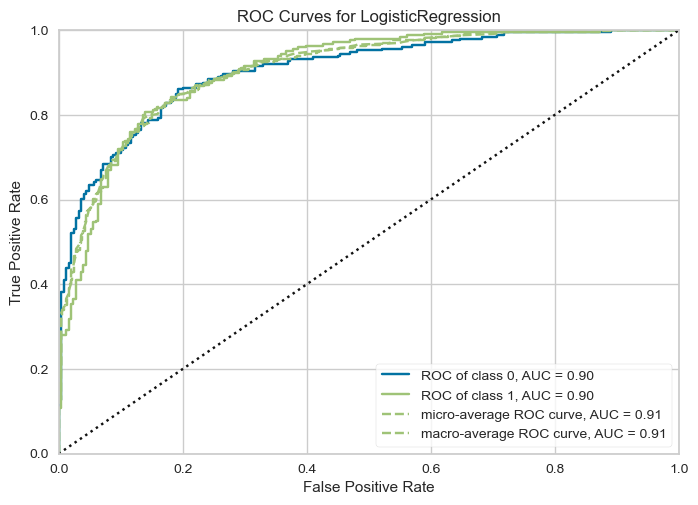

<AxesSubplot:title={'center':'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [ ]:
from yellowbrick.classifier import ROCAUC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pandas as pd

X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y)

model = LogisticRegression()

visualizer = ROCAUC(model)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()
